# 

### Import Modules

In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import random
import warnings
warnings.filterwarnings("ignore")
from sklearn.feature_selection import RFE, SelectKBest, mutual_info_classif
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [24]:
df = pd.read_csv('bank-additional.csv', sep=';')

# Prints the number of samples (rows) in the DataFrame
print ('Number of samples: ',len(df))

Number of samples:  4119


In [25]:
# Display the first few rows of the DataFrame
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


Performing Preprocessing such data cleaning, handling missing values, encoding, imbalanced datasets etc

In [26]:
# for each column
for a in list(df.columns):

    # get a list of unique values
    n = df[a].unique()

    # if number of unique values is less than 30, print the values. Otherwise print the number of unique values
    if len(n)<30:
        print(a)
        print(n)
    else:
        print(a + ': ' +str(len(n)) + ' unique values')

age: 67 unique values
job
['blue-collar' 'services' 'admin.' 'entrepreneur' 'self-employed'
 'technician' 'management' 'student' 'retired' 'housemaid' 'unemployed'
 'unknown']
marital
['married' 'single' 'divorced' 'unknown']
education
['basic.9y' 'high.school' 'university.degree' 'professional.course'
 'basic.6y' 'basic.4y' 'unknown' 'illiterate']
default
['no' 'unknown' 'yes']
housing
['yes' 'no' 'unknown']
loan
['no' 'unknown' 'yes']
contact
['cellular' 'telephone']
month
['may' 'jun' 'nov' 'sep' 'jul' 'aug' 'mar' 'oct' 'apr' 'dec']
day_of_week
['fri' 'wed' 'mon' 'thu' 'tue']
duration: 828 unique values
campaign
[ 2  4  1  3  6  7 27  5 12 14 10  8 11 13  9 15 16 18 17 22 19 23 24 35
 29]
pdays
[999  12   3   6   5   2  10  11   7   1  18   4  15   0  16   9  19  17
  13  21  14]
previous
[0 2 1 3 5 4 6]
poutcome
['nonexistent' 'failure' 'success']
emp.var.rate
[-1.8  1.1  1.4 -0.1 -1.1 -2.9 -1.7 -3.4 -3.  -0.2]
cons.price.idx
[92.893 93.994 94.465 93.2   94.199 93.918 93.444 93.369

In [27]:
# List of numerical columns to be transformed
numerical_cols = ['duration', 'pdays','age',]
# Apply square root transformation to the selected numerical columns 
# to mitigate the impact of extreme values.
df[numerical_cols]=np.sqrt(df[numerical_cols])
# Apply natural logarithm transformation to the selected numerical columns 
# after Adding 1 before taking the logarithm is a common practice to handle 
# zero values and prevent undefined results.
df[numerical_cols]=np.log(df[numerical_cols] + 1)

In [28]:
# replaces all occurrences of the string 'unknown' with NaN (Not a Number) in 
# the entire DataFrame.
df = df.replace('unknown', np.nan)
df = df.replace('nonexistent', np.nan)

# Print the count of missing values for each column
print("\nMissing values:")
print(df.isnull().sum())

# Check for duplicate rows
duplicate_rows = df[df.duplicated()]
print("\nNumber of duplicate rows:", len(duplicate_rows))


Missing values:
age                  0
job                 39
marital             11
education          167
default            803
housing            105
loan               105
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome          3523
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

Number of duplicate rows: 0


In [29]:
#handling missing values by filling them with the mode (most frequent value) of each respective column. 
df['job'].fillna(df['job'].mode()[0], inplace=True)
df['education'].fillna(df['education'].mode()[0], inplace=True)
df['marital'].fillna(df['marital'].mode()[0], inplace=True)
df['default'].fillna(df['default'].mode()[0], inplace=True)
df['housing'].fillna(df['housing'].mode()[0], inplace=True)
df['loan'].fillna(df['loan'].mode()[0], inplace=True)
df['poutcome'].fillna(df['poutcome'].mode()[0], inplace=True)

In [30]:
#control -> print count of missing values for each column
missing = df.isnull().sum()
print(missing)

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


In [31]:
# Print the data types of each column, the number of non-null values, and 
# memory usage.
print("Dataset information:")
print(df.info())

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   float64
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   float64
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   float64
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.id

In [32]:
df = df.drop("day_of_week", axis='columns')
df = df.drop("month", axis='columns')
df = df.drop("default", axis='columns')
df = df.drop("euribor3m", axis='columns')

In [33]:
# Define lists of categorical and numerical columns
categorical_cols = ['job', 'marital', 'education', 'housing', 'loan', 'contact', 'poutcome']
numerical = ['age','campaign', 'emp.var.rate', 'cons.price.idx','cons.conf.idx', 'nr.employed']


#### One-Hot Encoding and Label Encoding

In [34]:
# Iterate through each categorical column and print unique values
for column in categorical_cols:
    unique_values = df[column].unique()
    print(f"Unique values in {column}: {unique_values}")

Unique values in job: ['blue-collar' 'services' 'admin.' 'entrepreneur' 'self-employed'
 'technician' 'management' 'student' 'retired' 'housemaid' 'unemployed']
Unique values in marital: ['married' 'single' 'divorced']
Unique values in education: ['basic.9y' 'high.school' 'university.degree' 'professional.course'
 'basic.6y' 'basic.4y' 'illiterate']
Unique values in housing: ['yes' 'no']
Unique values in loan: ['no' 'yes']
Unique values in contact: ['cellular' 'telephone']
Unique values in poutcome: ['failure' 'success']


In [35]:
#Encode categorical variables (One-Hot Encoding)
data_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [36]:
from sklearn.preprocessing import LabelEncoder
# Perform label encoding on categorical columns
label_encoder = LabelEncoder()
for column in categorical_cols:
    df[column] = label_encoder.fit_transform(df[column])

# Encode the 'y' column (target variable)
label_encoder = LabelEncoder()
df['y'] = label_encoder.fit_transform(df['y'])


In [37]:
from sklearn.preprocessing import StandardScaler
# Perform standardization on numerical columns
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

Splitting training and testing set to have unseen data while evaluating performances of models

In [38]:
# Separate features X and target variable y
X = df.drop('y', axis=1)
y = df['y']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
# Prints the count of each unique value in the target variable y
print(y.value_counts())

y
0    3668
1     451
Name: count, dtype: int64


As shown above we have an imbalanced dataset. Thus, we performed oversampling to get a balanced dataset.

In [40]:
from imblearn.over_sampling import RandomOverSampler 

X = df.drop(columns=['y'])  # Assuming 'y' is the target variable
y = df['y']
class_counts = y.value_counts()

# Oversample the minority class to match the majority class
oversampler = RandomOverSampler(sampling_strategy='minority')
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Update the dataframe with the resampled data
df = pd.concat([X_resampled, y_resampled], axis=1)
print('Number of samples: ', len(df))

# Check the number of 'yes' and 'no' samples
print(y_resampled.value_counts())


Number of samples:  7336
y
0    3668
1    3668
Name: count, dtype: int64


Now time to apply pipeline and evaluate performance of models performing hyperparameter tuning and gridsearch for each.

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score

### Logistic Regression

In [42]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Standardize the features to ensure that they have zero mean and unit variance.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression with Cross-validation and Hyperparameter Tuning
logreg = LogisticRegression()

# Define hyperparameter grid for tuning
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': np.logspace(-4, 4, 20),
    'solver': ['liblinear']
}

# Create StratifiedKFold for cross-validation to ensure that each fold has a balanced class distribution.
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Create GridSearchCV object perform a search over the specified hyperparameter grid. The scoring metric used is accuracy.
grid_search = GridSearchCV(logreg, param_grid, cv=cv, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit the model
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best Hyperparameters: {'C': 0.23357214690901212, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy: 0.8992718446601942
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.94       732
           1       0.57      0.38      0.46        92

    accuracy                           0.90       824
   macro avg       0.75      0.67      0.70       824
weighted avg       0.89      0.90      0.89       824



In [43]:

from sklearn.model_selection import cross_val_score

# Create a range of regularization strengths for logistic regression
C_values = np.logspace(-4, 4, 20)

# Lists to store mean AUC values
mean_auc_l1 = []
mean_auc_l2 = []

# Loop through different values of C
# For each value of C, it uses cross-validated logistic regression models with L1 and L2 regularization
for C_value in C_values:

    # Logistic regression with L2 regularization
    model_l2 = LogisticRegression(penalty='l2', C=C_value, solver='liblinear', random_state=42)
    auc_scores_l2 = cross_val_score(model_l2, X_train_scaled, y_train, cv=5, scoring='roc_auc')
    mean_auc_l2.append(np.mean(auc_scores_l2))

    # Logistic regression with L1 regularization
    model_l1 = LogisticRegression(penalty='l1', C=C_value, solver='liblinear', random_state=42)
    auc_scores_l1 = cross_val_score(model_l1, X_train_scaled, y_train, cv=5, scoring='roc_auc')
    mean_auc_l1.append(np.mean(auc_scores_l1))
    # Computes the mean area under the ROC curve (AUC) for each regularization type.


### Random Forest

In [44]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest with Cross-validation and Hyperparameter Tuning
rf = RandomForestClassifier()

# Define hyperparameter grid for tuning
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
}

# Create GridSearchCV object for Random Forest
rf_grid_search = GridSearchCV(rf, rf_param_grid, cv=cv, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit the model
rf_grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_rf_params = rf_grid_search.best_params_
print(f"Best Random Forest Hyperparameters: {best_rf_params}")

# Get the best model
best_rf_model = rf_grid_search.best_estimator_

# Make predictions on the test set
y_rf_pred = best_rf_model.predict(X_test_scaled)

# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_rf_pred)
print(f"Random Forest Accuracy: {accuracy_rf}")

# Display classification report
print("Random Forest Classification Report:")
print(classification_report(y_test, y_rf_pred))


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Random Forest Hyperparameters: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 200}
Random Forest Accuracy: 0.9053398058252428
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       732
           1       0.59      0.49      0.54        92

    accuracy                           0.91       824
   macro avg       0.76      0.72      0.74       824
weighted avg       0.90      0.91      0.90       824



In [45]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, roc_auc_score


# Define a custom scorer for cross_val_score
auc_scorer = make_scorer(roc_auc_score, needs_proba=True)

# Perform cross-validation and get AUC scores for each fold
auc_scores_rf = cross_val_score(best_rf_model, X_train_scaled, y_train, cv=cv, scoring=auc_scorer)

# Calculate the mean AUC
mean_auc_rf = np.mean(auc_scores_rf)

print(f'Mean AUC for Random Forest: {mean_auc_rf:.2f}')

Mean AUC for Random Forest: 0.93


### Neural Network

In [46]:
from sklearn.neural_network import MLPClassifier

# Neural Network with Cross-validation and Hyperparameter Tuning
nn = MLPClassifier()

# Define hyperparameter grid for tuning
nn_param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'activation': ['logistic', 'tanh', 'relu'],
    'alpha': [0.0001, 0.001, 0.01],
}

# Create GridSearchCV object for Neural Network
nn_grid_search = GridSearchCV(nn, nn_param_grid, cv=cv, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit the model
nn_grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_nn_params = nn_grid_search.best_params_
print(f"Best Neural Network Hyperparameters: {best_nn_params}")

# Get the best model
best_nn_model = nn_grid_search.best_estimator_

# Make predictions on the test set
y_nn_pred = best_nn_model.predict(X_test_scaled)

# Evaluate the Neural Network model
accuracy_nn = accuracy_score(y_test, y_nn_pred)
print(f"Neural Network Accuracy: {accuracy_nn}")

# Display classification report
print("Neural Network Classification Report:")
print(classification_report(y_test, y_nn_pred))

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Neural Network Hyperparameters: {'activation': 'logistic', 'alpha': 0.001, 'hidden_layer_sizes': (50, 50)}
Neural Network Accuracy: 0.9016990291262136
Neural Network Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       732
           1       0.57      0.49      0.53        92

    accuracy                           0.90       824
   macro avg       0.75      0.72      0.74       824
weighted avg       0.90      0.90      0.90       824



In [47]:
from sklearn.neural_network import MLPClassifier

nn_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=100, random_state=42)

# Cross-validation for Neural Network
# Computes the mean AUC-ROC score across all folds.
auc_scores_nn = cross_val_score(nn_model, X_train_scaled, y_train, cv=5, scoring='roc_auc')
mean_auc_nn = np.mean(auc_scores_nn)

### Evaluating

The mean AUC values for each model are used to generate the plot.

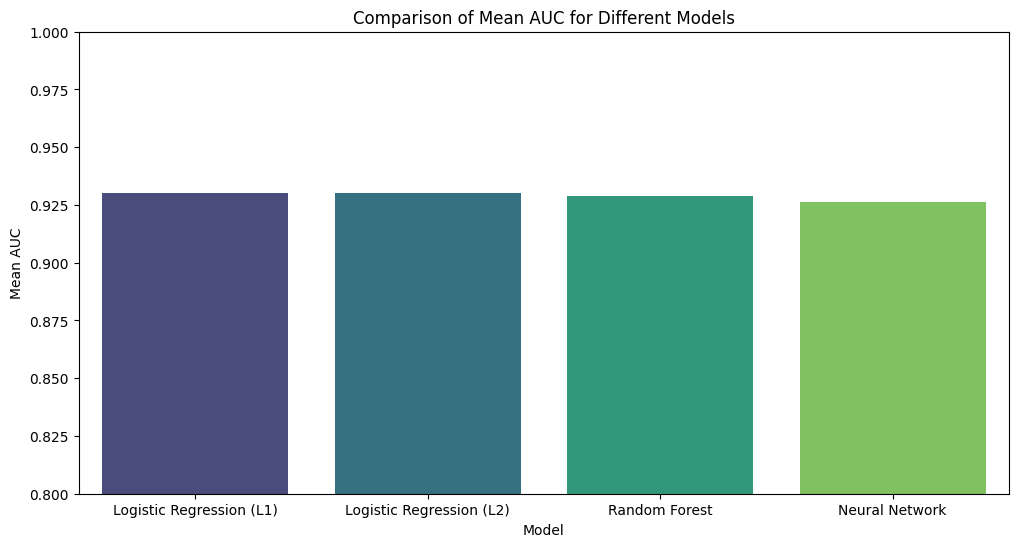

In [57]:
model_names = ['Logistic Regression (L1)', 'Logistic Regression (L2)', 'Random Forest', 'Neural Network']
mean_auc_values = [mean_auc_l1[-1], mean_auc_l2[-1], mean_auc_rf, mean_auc_nn]

auc_df = pd.DataFrame({'Model': model_names, 'Mean AUC': mean_auc_values})

# Plot the results
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Mean AUC', data=auc_df, palette='viridis')
plt.ylim(0.8, 1.0)  
plt.title('Comparison of Mean AUC for Different Models')
plt.show()

Although there is not a big difference but we proceed with Random Forest as it has a higher accuracy

In [49]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

In [50]:
from sklearn.feature_selection import SelectKBest, f_classif
feature_selector = SelectKBest(score_func=f_classif, k=10)

In [51]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical),
        ('cat', categorical_transformer, categorical_cols),
    ])

In [52]:
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('selector', feature_selector),
    ('model', RandomForestClassifier())  
])

In [53]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'campaign',
                                                   'emp.var.rate',
                                                   'cons.price.idx',
                                                   'cons.conf.idx',
                                                   'nr.employed']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['job', 'marital',
                                                   'education', 'housing',
                                                   'loan', 'contact',
                                                   'poutcome'])])),
                ('selector', SelectKBest()),
                ('model', RandomForestClassifier())])

In [54]:
y_pred = pipeline.predict(X_test)

In [55]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94       732
           1       0.53      0.21      0.30        92

    accuracy                           0.89       824
   macro avg       0.72      0.59      0.62       824
weighted avg       0.86      0.89      0.87       824



Saving the model for deploying

In [56]:
import joblib
from sklearn.linear_model import LogisticRegression

def train_and_save_model(X_train_scaled, y_train, C_value):
    final_model = LogisticRegression(penalty='l2', C=C_value, solver='liblinear')  
    final_model.fit(X_train_scaled, y_train)
    
    filename = 'bank-additional.sav'
    
    with open(filename, 'wb') as file:
        joblib.dump(final_model, file)
    
    return filename

# Example usage:
# Assuming you have X_train_scaled, y_train, and C_value defined elsewhere
resulting_filename = train_and_save_model(X_train_scaled, y_train, C_value)
print("Model saved to:", resulting_filename)


Model saved to: bank-additional.sav
